In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import numpy as np

#### Plot relationship between chamber temperature and soil temperature measurements

In [3]:
basepath = 'C:/Users/roseh/Desktop/NYBG_R/data/processed/QC2'
os.chdir(basepath)

In [41]:
df = pd.read_csv('NYBG_CO2_Flux_and_Temps.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    176 non-null    int64  
 1   Date          176 non-null    object 
 2   Chamber_Temp  176 non-null    float64
 3   Collar        176 non-null    object 
 4   CO2_Flux      176 non-null    float64
 5   Site          176 non-null    object 
 6   Type          176 non-null    object 
 7   Chamber Used  176 non-null    object 
 8   Temperature   172 non-null    float64
 9   Moisture      173 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 13.9+ KB


In [48]:
df.dropna(axis=0,inplace=True)

In [52]:
df.loc[df['Chamber_Temp']< 0]

,Unnamed: 0,Date,Chamber_Temp,Collar,CO2_Flux,Site,Type,Chamber Used,Temperature,Moisture
22,9,6/7/2022 10:41,-90.37,BT_FI4,8.77534,BT,FI,R,17.4,33.4


In [53]:
df.drop(22,inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 175
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    171 non-null    int64  
 1   Date          171 non-null    object 
 2   Chamber_Temp  171 non-null    float64
 3   Collar        171 non-null    object 
 4   CO2_Flux      171 non-null    float64
 5   Site          171 non-null    object 
 6   Type          171 non-null    object 
 7   Chamber Used  171 non-null    object 
 8   Temperature   171 non-null    float64
 9   Moisture      171 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ KB


In [55]:
soil_temp = df['Temperature']
chamber_temp = df['Chamber_Temp']

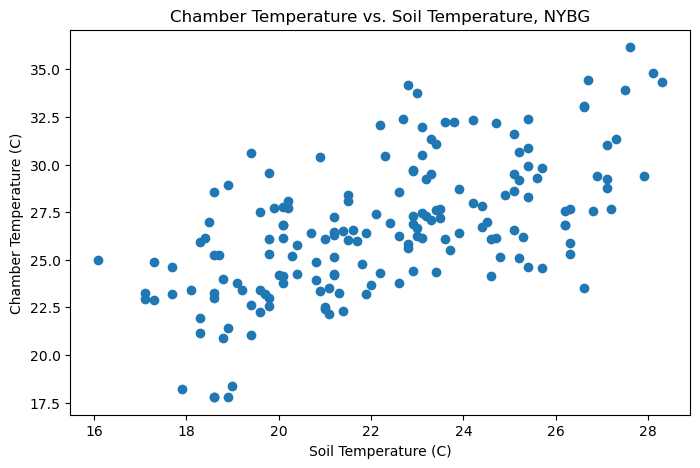

In [63]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x=df['Temperature'], y=df['Chamber_Temp'])
ax.set_xlabel('Soil Temperature (C)')
ax.set_ylabel('Chamber Temperature (C)')
ax.set_title('Chamber Temperature vs. Soil Temperature, NYBG')
plt.show()

In [65]:
grouped = df.groupby('Type')

In [69]:
FI = grouped.get_group('FI')
FE = grouped.get_group('FE')
HL = grouped.get_group('HL')
ML = grouped.get_group('ML')
SV = grouped.get_group('SV')
TP = grouped.get_group('TP')
UL = grouped.get_group('UL')

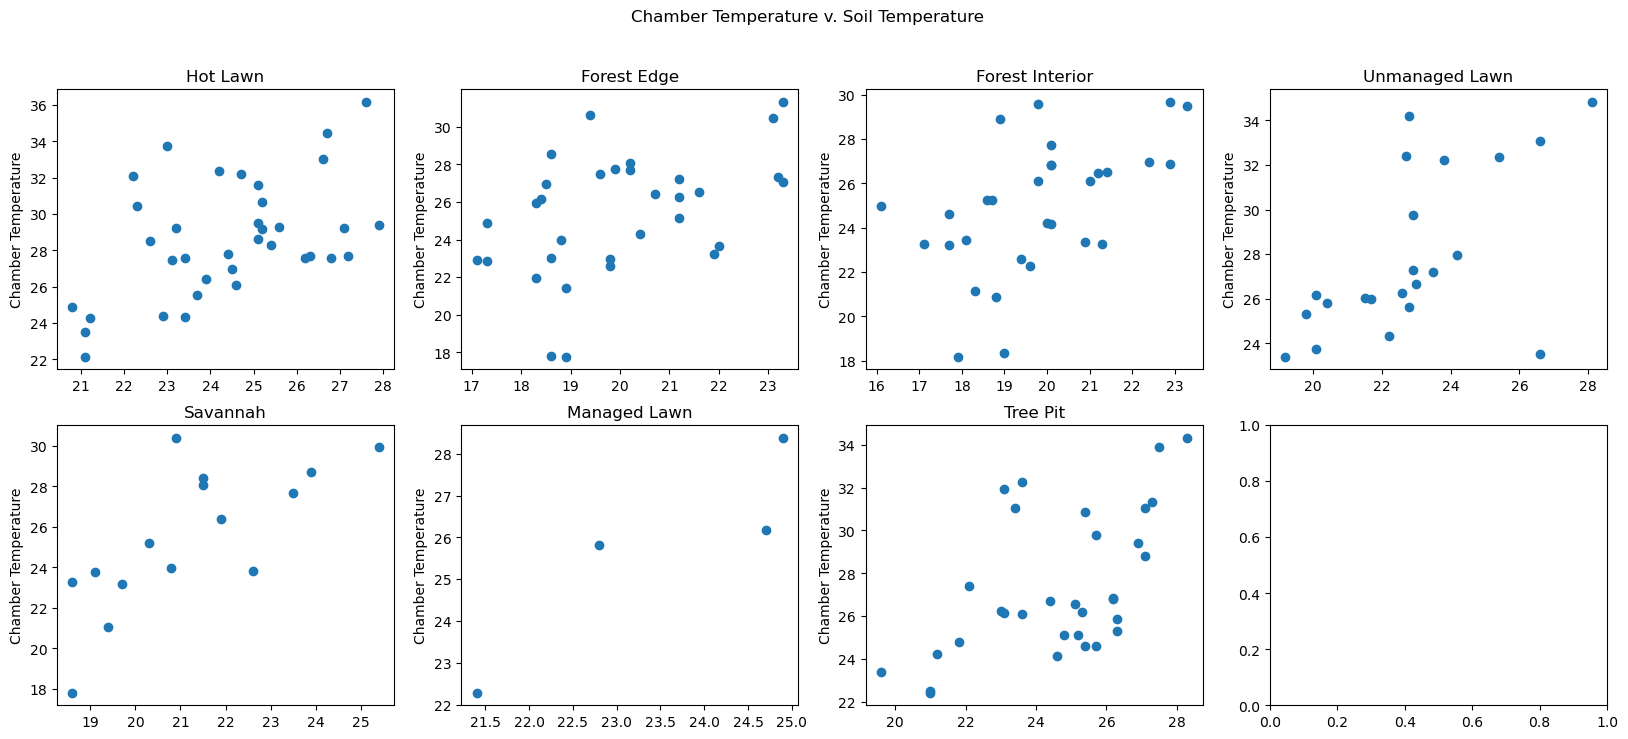

In [93]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
fig.suptitle('Chamber Temperature v. Soil Temperature')

hot_lawn = axes[0][0]
hot_lawn.set_title('Hot Lawn')
forest_edge = axes[0][1]
forest_edge.set_title('Forest Edge')
forest_interior = axes[0][2]
forest_interior.set_title('Forest Interior')
unmanaged_lawn = axes[0][3]
unmanaged_lawn.set_title('Unmanaged Lawn')
savannah = axes[1][0]
savannah.set_title('Savannah')
managed_lawn = axes[1][1]
managed_lawn.set_title('Managed Lawn')
tree_pit = axes[1,2]
tree_pit.set_title('Tree Pit')

def make_plot(ax,df):
    ax.scatter(df['Temperature'],df['Chamber_Temp'])
    ax.set_ylabel('Chamber Temperature')
   
    
make_plot(hot_lawn,HL)
make_plot(forest_edge,FE)
make_plot(forest_interior,FI)
make_plot(unmanaged_lawn,UL)
make_plot(savannah,SV)
make_plot(managed_lawn,ML)
make_plot(tree_pit,TP)


plt.show()